# **Basic Data Science Projects using Python, NumPy, Pandas, Matplotlib, Regular Expressions, and SQL**

<center>

*By: Prof. James Abello, Haoyang Zhang*

*Computer Science Department*

*Rutgers University*

*Nov. 21, 2024.*

</center>

## Topic 1: Game of Life (NumPy, matplotlib)

#### **Objective:** Implement using NumPy and matplotlib a custom version of the Game of Life where users can provide their own update rules.

#### **Estimated Completion Time: 6 hours**


This game is an example of a Cellular Automaton. Each cell corresponds to a point in 2D.

A good video reference is 
> Stephen Hawkings The Meaning of Life (John Conway's Game of Life segment) by 0524432
> 
> https://www.youtube.com/watch?v=CgOcEZinQ2I

Consider a grid of 2D cells each represented by a 2D unit square. Each cell has two states: dead (encoded as 0) or alive (encoded as 1). Each cell in the grid is updated in discrete time steps depending on the **state of its eight neighbors**. 

Initially, some cells are selected randomly to be alive and the rest are dead. The grid is updated in **each time step** according to the following **basic** rules:
- if a dead cell has 3 neighbors alive, then it the comes back to life
- if an alive cell has 2 or 3 neighbors alive, then the cell continues to be alive.
- if an alive cell has less than 2 or more than 3 neighbors alive, then the cell dies.

**The goal** of the game is to find patterns that evolve in interesting ways – something that people have now been doing for over 50 years.
> https://playgameoflife.com/

For example:
- gliders: 
    > https://playgameoflife.com/lexicon/glider
- spaceships:
    > https://playgameoflife.com/lexicon#iz5
- splitter
    > https://playgameoflife.com/lexicon/splitter
- Herschel receiver
    > https://playgameoflife.com/lexicon/herschel-receiver
- G4 receiver
    > https://playgameoflife.com/lexicon/G4_receiver

**What to submit:**
- Your code that simulates the game of life with the **basic rules**.
- A 30-second video of a pattern that was generated by your code and you find surprising or interesting.

An approach to be successful is to design on local patterns that could generate other patterns according to the specified rules. Another approach is to try to understand the effect of different rules.

### Tasks

#### Level 1 (fixed set of rules, 15 pts) 
From a randomly selected initial subset of life cells, and a fixed set of rules, find interesting patterns

```mermaid
graph TB
    Init["Generate an initial random subset of life cells (2D points)"]
    Draw_init["Display the 2D positions of the selected collection of cells (2D points)"]
    Update["For each cell evaluate the update rules specified above to obtain its new state"]
    Draw["Display the 2D positions of the current life cells (2D points)"]
    More{"Ask the user if he/she wants to update once more?"}

    START([Start])
    END([End])

    START --> Init
    Init --> Draw_init
    Draw_init --> Update
    Update --> Draw
    Draw --> More
    More -- Yes --> Update
    More -- No --> END  
```

##### Task 1.1
After playing the game at https://playgameoflife.com/
- Implement a Python function `init_life_state_1()` by using NumPy to generate an initial random subset of life cells (a subset of coordinates whose representing points are considered alive).
- Implement a Python function `draw_life_state_1()` by using matplotlib to display the selected collection of cells (points). Use the following line of Python code to paint the background of the selected collection of cells in light gray.
    ```python
    def draw_cell_background(x, y):
        plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color='lightgray')
    ```


In [1]:
import matplotlib.pyplot as plt

def draw_cell_background(x, y):
    
    plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color='lightgray')

In [2]:
def init_life_state_1(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    #make the random grid object
    random_grid = np.random.rand(n,m)
    #create the state
    inital_state = (random_grid < p).astype(int)
    return inital_state

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def draw_life_state_1(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
    OUT: None
    """
    n, m = life_state.shape
     #help from previous assignments/online
    plt.figure(figsize=(8, 8))
    plt.axis=('equal')
    plt.gca().set_xticks(range(m))
    plt.gca().set_yticks(range(n))
    plt.gca().grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
   # plt.gca().invert_yaxis()
        
    # Plot the cells that are 'alive'
    for x in range(n):
        for y in range(m):
            if life_state[x, y] == 1: #1 means cell is alive, so plot
                draw_cell_background(y, x)
    plt.show()

#TESTING
"""
life_state = init_life_state_1(n, m, p)
draw_life_state_1(life_state)
updated_life_state = update_life_state_1(life_state)
draw_life_state_1(updated_life_state)
"""
#ANOTHER TESTING SECTION
"""
n, m = 10, 10
life_state = np.random.randint(0, 2, size=(n, m))
draw_life_state_1(life_state)
"""

'\nn, m = 10, 10\nlife_state = np.random.randint(0, 2, size=(n, m))\ndraw_life_state_1(life_state)\n'

##### Task 1.2

Implement a Python function `update_life_state_1()` that takes a 2D NumPy array representing the current state of the grid and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

Note: Make sure that all the cells are updated simultaneously. That is, the new state of each cell should be computed based on the original state of all the cells.

In [4]:

def update_life_state_1(life_state, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """

    n, m = life_state.shape
    if out_life_state is None:
        out_life_state = np.zeros_like(life_state)

    #all possible neighbors
    neighbors_positions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    for i in range(n):
        for j in range(m):
            #not totally sure how it works, gets the number of 'neigbors'
            neighbors = sum(life_state[(i + dx) % n, (j + dy) % m] for dx, dy in neighbors_positions)
            if life_state[i, j] == 1:
                #dead or alive calculations
                if neighbors < 2 or neighbors > 3:
                    out_life_state[i, j] = 0
                else:
                    out_life_state[i, j] = 1
            else:
                if neighbors == 3:
                    out_life_state[i, j] = 1

    return out_life_state

    

##### Task 1.3

Use `draw_life_state_1()` to display the current state of the grid.

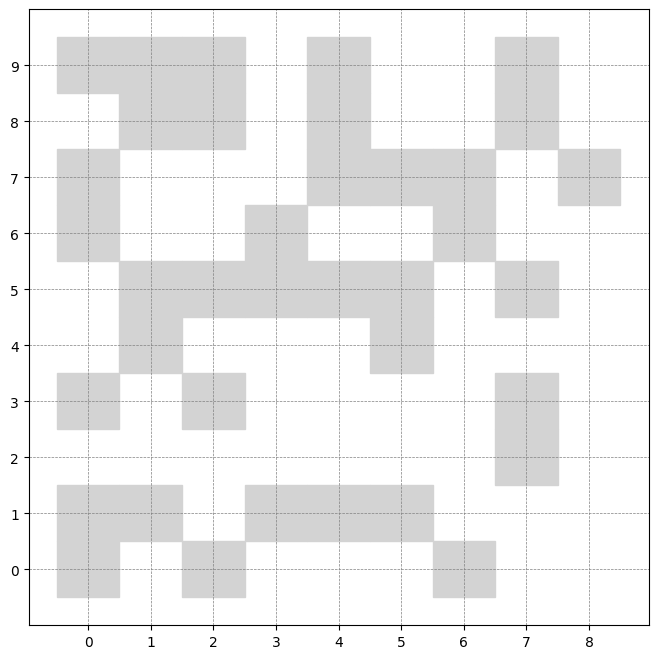

In [5]:
life_state = init_life_state_1(10,10,0.35)
draw_life_state_1(life_state)

##### Task 1.4

Implement a Python function `play_game_of_life_1()` that uses the functions implemented above to play the game of life. The function should ask the user the desired number of iterations to update the grid and display the grid at each iteration. When reaching the desired number of iterations, the function should ask the user if he/she wants to update more times. If the user does not want to continue updating, the function should ask the user if he/she wants to save the initial collection of life cells and the final configuration (caveat: this may not be always feasible) as a csv file.

In [6]:
import numpy as np
import csv

def play_game_of_life_1():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    try: 
        # ask the user for initial state
        n = int(input("Please enter number of rows: "))
        m = int(input("Please enter number of columns: "))
        p = float(input("Please enter probability of a cell being alive as a decimal from in between 0-1 (ex: 0.5): "))
        life_state = init_life_state_1(n, m, p)
        initial_state = life_state.copy()
    except:
        print("Invalid inputs, default values used")
        n = 20
        m = 20
        p = 0.25
        life_state = init_life_state_1(n, m, p)
        initial_state = life_state.copy()

    # ask the user for the number of iterations
    try: iterations = int(input("Please enter number of iterations to display: "))
    except: iterations = 10

    # update the grid and display it at each iteration
    for i in range(iterations):
        life_state = update_life_state_1(life_state)
        draw_life_state_1(life_state)
    # ask the user if he/she wants to update more times

    extra_iterations = input("Do you want more iterations? ").lower()
    if extra_iterations == 'yes' : display_iterations = input("Do you want to display each iteration? yes/no").lower()
    while extra_iterations == 'yes':
        iterations = int(input("Please enter number of iterations: "))
        for i in range(iterations):
            life_state = update_life_state_1(life_state)
            if display_iterations == 'yes': draw_life_state_1(life_state)
        extra_iterations = input("Do you want more iterations? yes/no").lower()
    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file
    
    save = input("Do you want to save as a CSV? Enter 'yes' or 'no' ").lower()
    try:

        if save == 'yes':
            initial_name = input("What is the name of the initial state file name? ")
            final_name = input("What is the name of the final state file name? ")
            with open(initial_name, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerows(initial_state.astype(int))
            with open(final_name, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerows(life_state.astype(int))
    except:
        print("An error occured.")



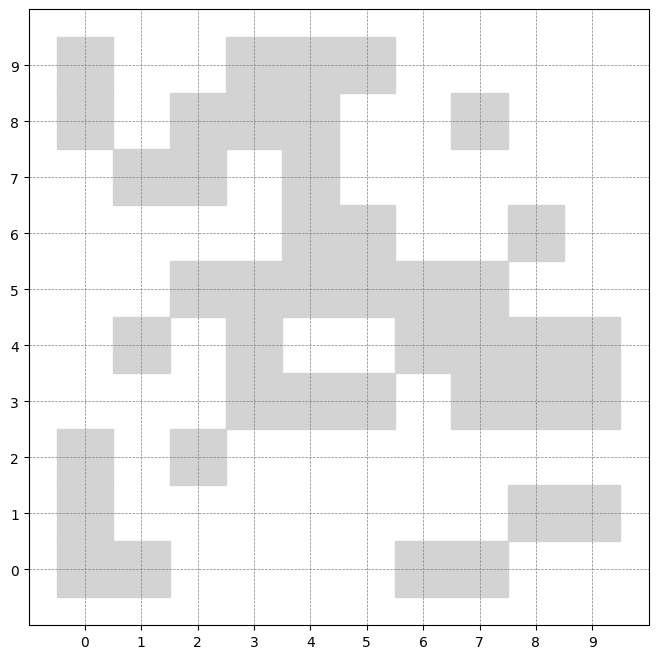

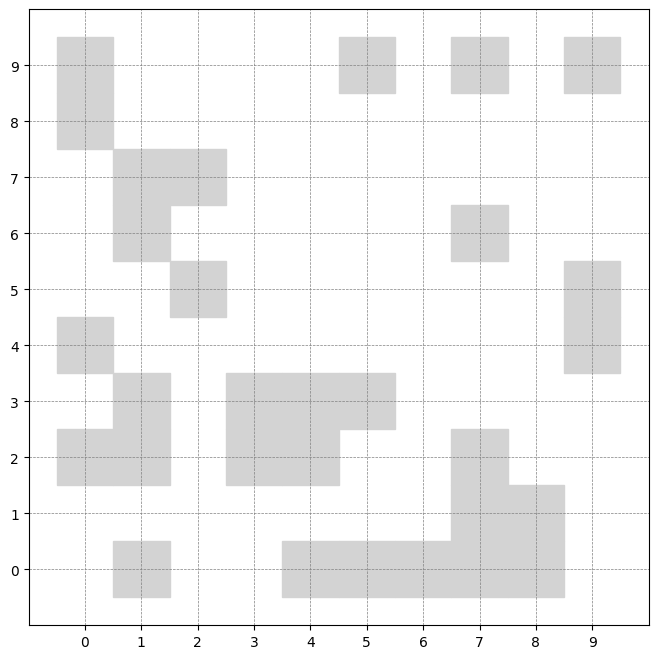

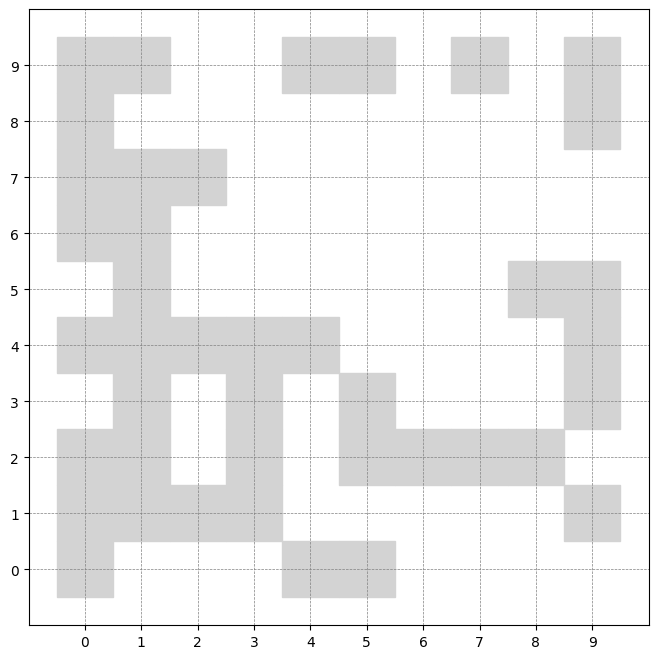

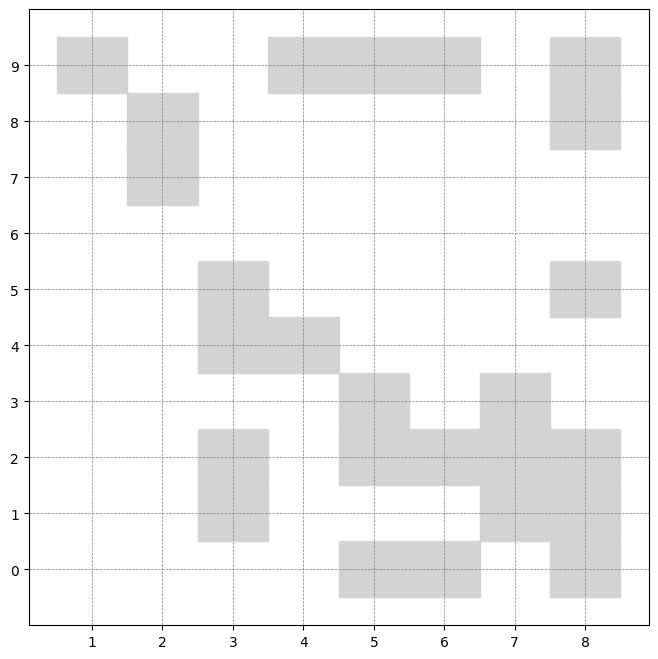

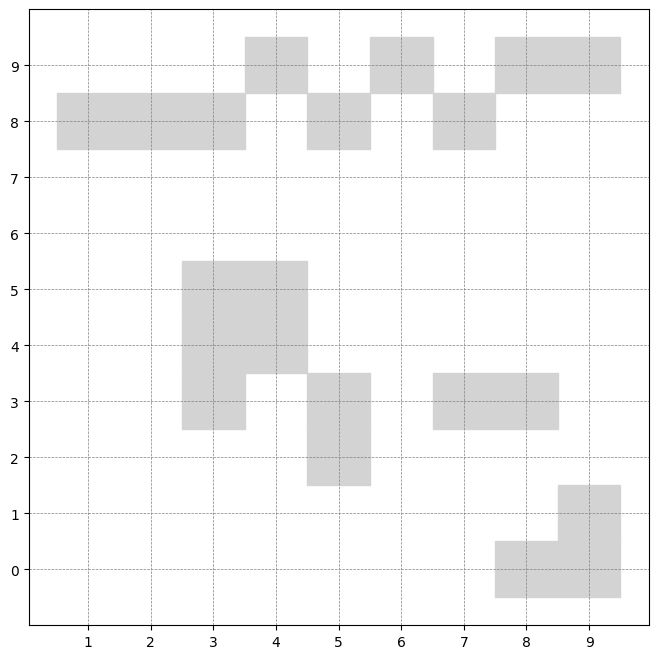

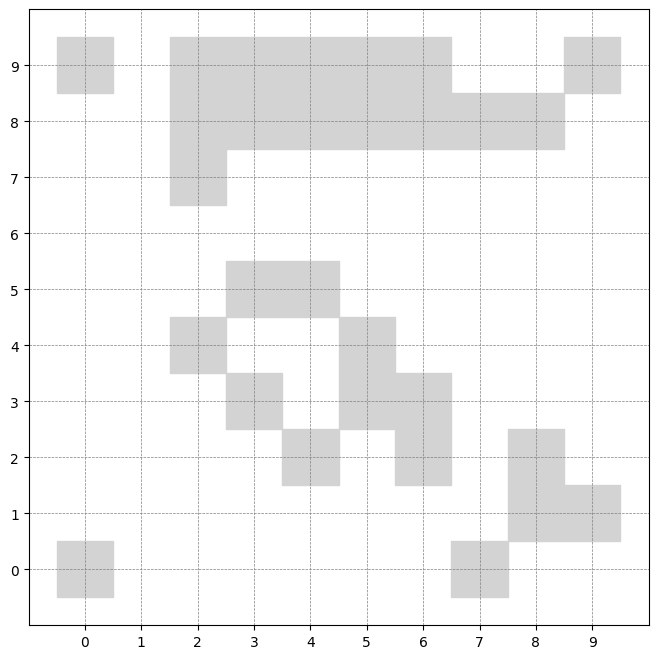

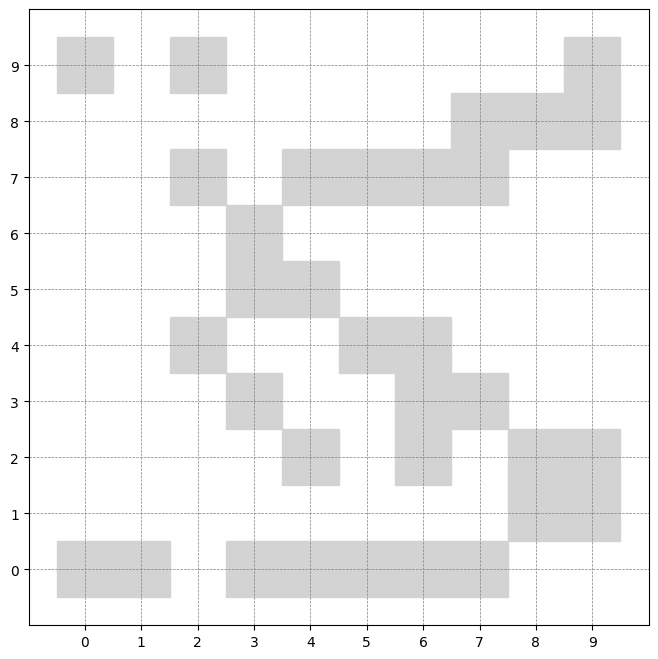

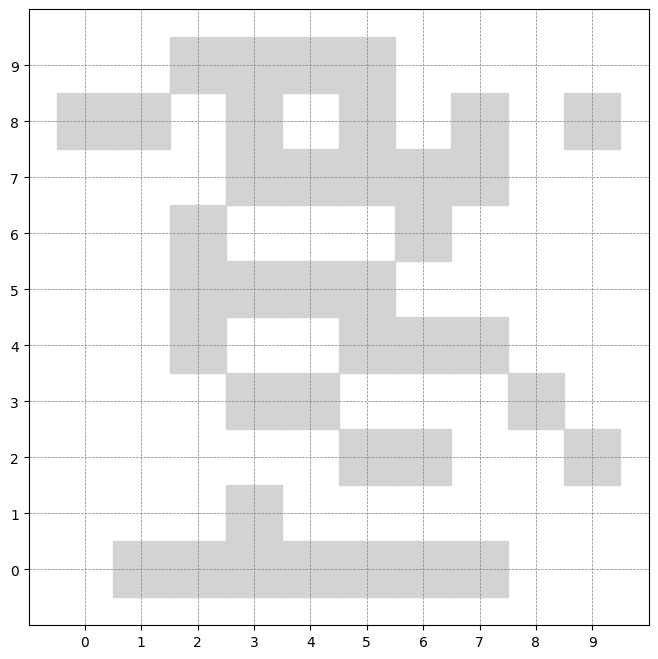

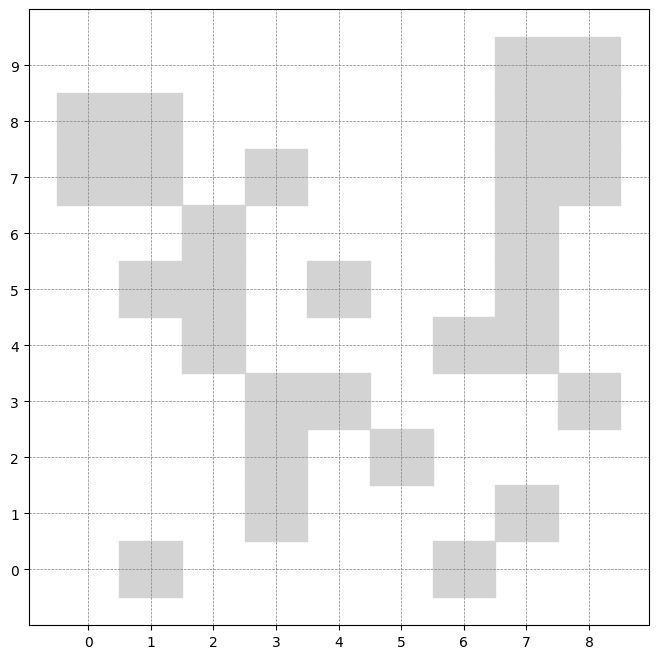

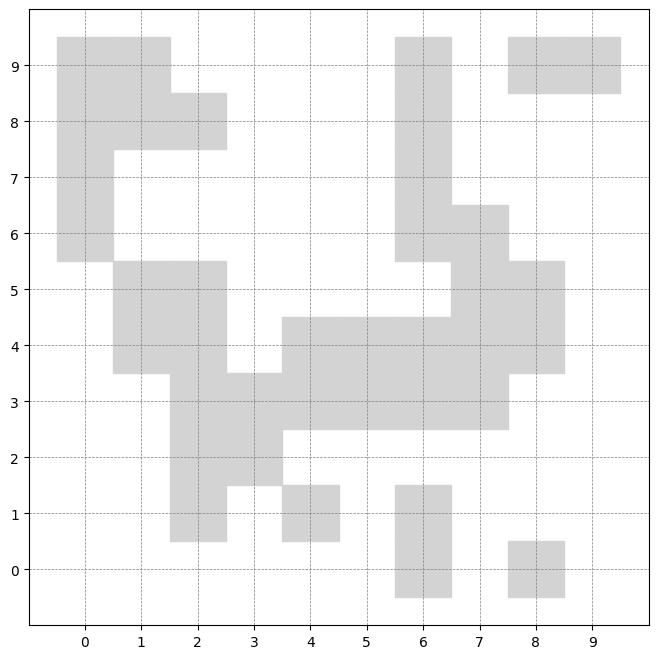

In [7]:
#Call the function for TESTING
play_game_of_life_1()

#### Level 2 (user-specified rules, 15 pts)

From a randomly selected initial subset of life cells, and a user-specified set of rules, find interesting patterns.

A user can specify a rule by inputting four integers: $b_1$, $b_2$, $d_1$, and $d_2$ between $0$ and $8$, and $d_1 \leq b_1 \leq b_2 \le d_2$. The rules are as follows:

- if a dead cell has at least $b_1$ and at most $b_2$ neighbors alive, then it the comes back to life
- if an alive cell has at least $d_1$ and at most $d_2$ neighbors alive, then it continues to be alive.
- if an alive cell has less than $d_1$ or more than $d_2$ neighbors alive, then the cell dies.

Notice that if $b_1 = 3$, $b_2 = 3$, $d_1 = 2$, and $d_2 = 3$, then the rules are the **basic rules**.

##### Task 2.1

The same as Task 1.1.

In [8]:
import numpy as np

def init_life_state_2(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    #copied code from 1.1 basically
    random_grid = np.random.rand(n, m)
    initial_state = (random_grid < p).astype(int)
    return initial_state

   # return init_life_state_1(n, m, p)

##### Task 2.2

Implement a Python function `update_life_state_2()` that takes the same in input as `update_life_state_1()` plus the four integers that defaults to `b1=3, b2=3, d1=2, d2=3` and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

In [9]:

def update_life_state_2(life_state, b1=3, b2=3, d1=2, d2=3, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        b1, int, lower bound of the number of neighbors for a dead cell to come back to life
        b2, int, upper bound of the number of neighbors for a dead cell to come back to life
        d1, int, lower bound of the number of neighbors for an alive cell to continue to be alive
        d2, int, upper bound of the number of neighbors for an alive cell to continue to be alive
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """

    n, m = life_state.shape
    if out_life_state is None:
        out_life_state = np.zeros_like(life_state)
    #all possible positions of neighbor cells
    neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    for i in range(n):
        for j in range(m):
            #calculating live neighbors is different from part 1
            live_neighbors = 0
            #le and ri mean left/right, helps me remember neighbors
            for le, ri in neighbors:
                #up and down aren't literal, just names
                up, down = i + le, j + ri
                if 0 <= up < n and 0 <= down < m:
                    live_neighbors += life_state[up, down]
            if life_state[i, j] == 0:
                if b1 <= live_neighbors <= b2:
                    out_life_state[i, j] = 1
                else:
                    out_life_state[i, j] = 0
            elif life_state[i, j] == 1:
                if d1 <= live_neighbors <= d2:
                    out_life_state[i, j] = 1
                else:
                    out_life_state[i, j] = 0
    
    return out_life_state



##### Task 2.3

The same as Task 1.3.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#basically what was done in part 1
def draw_life_state_2(life_state):
    """
    Display the current state of the grid using matplotlib.
    IN: life_state, ndarray of shape (n, m), state of the cells
    OUT: None
    """
    n, m = life_state.shape

    plt.figure(figsize=(8, 8))
    plt.imshow(life_state, cmap='binary', interpolation='nearest')
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_xticks(range(m))
    ax.set_yticks(range(n))
    ax.invert_yaxis()
    ax.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
    plt.show()

#TESTING
"""
n, m = 10, 10
p = 0.3
life_state = init_life_state_2(n, m, p) 
draw_life_state_2(life_state)
"""


'\nn, m = 10, 10\np = 0.3\nlife_state = init_life_state_2(n, m, p) \ndraw_life_state_2(life_state)\n'

##### Task 2.4

Implement a Python function `play_game_of_life_2()` that is similar to Task 1.4 `play_game_of_life_1()`, except that the user should be able to specify the rules, and when saving the initial collection of life cells and the final configuration, the function should also write the rules as a JSON file in the format of a dictionary. For the **basic rules**, the JSON format should be as follows:
```json
{
    "b1": 3,
    "b2": 3,
    "d1": 2,
    "d2": 3
}
```

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import json

def play_game_of_life_2():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    try: 
        # ask the user for initial state
        n = int(input("Please enter number of rows: "))
        m = int(input("Please enter number of columns: "))
        p = float(input("Please enter probability of a cell being alive (0-1): "))
        life_state = init_life_state_2(n, m, p)
        initial_state = life_state.copy()

        # ask the user for the rules
        check = input("Enter whole numbers between 0 and 8 for the following rule questions")
        b1 = int(input("b1, min neighbors for a dead cell to become alive: "))
        b2 = int(input("b2, max neighbors for a dead cell to become alive: "))
        d1 = int(input("d1, min neighbors for a live cell to stay alive: "))
        d2 = int(input("d2, max neighbors for a live cell to stay alive: "))
        if not (b1 <= b2 and d1 <= d2):
            print("mins must be less than the maxes, start over")
            return
        rules = {"b1": b1, "b2": b2, "d1": d1, "d2": d2}
    except: 
        print('Incorrect Values entered. Please try again.')
        return 
    
    # update the grid and display it at each iteration
    while True:
        draw_life_state_2(life_state)
        life_state = update_life_state_2(life_state, b1, b2, d1, d2)
        cont = input("Do you want to continue to the next iteration?").lower()
        if cont != 'yes':
            break

    # ask the user if he/she wants to update more times
    extra_iterations = input("Do you want more iterations? yes/no ").lower()
    display_iterations = input("Do you want to display each iteration? yes/no").lower()
    while extra_iterations == 'yes':
        iterations = int(input("Please enter number of iterations: "))
        for i in range(iterations):
            life_state = update_life_state_2(life_state, b1, b2, d1, d2)
            if display_iterations == 'yes' : draw_life_state_2(life_state)
        extra_iterations = input("Do you want more iterations? yes/no ").lower()
    
    

    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file, and the rules as a JSON file
    save = input("Do you want to save as a CSV? ").lower()
    if save == 'yes':
        initial_name = input("What is the name of the initial state file name? ")
        final_name = input("What is the name of the final state file name? ")
        rules_file = input("What is the name of the rules file? ")
        with open(initial_name, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(initial_state.astype(int))
        with open(final_name, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(life_state.astype(int))
        with open(rules_file, "w") as json_file:
            json.dump(rules, json_file)

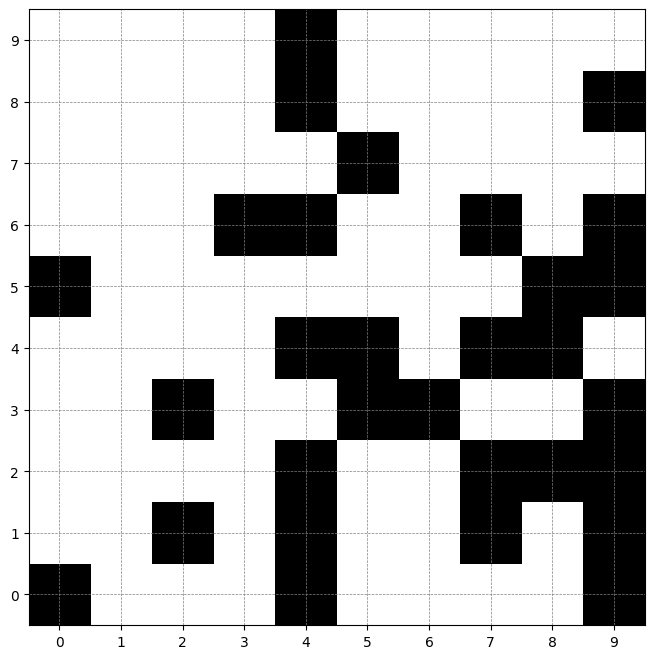

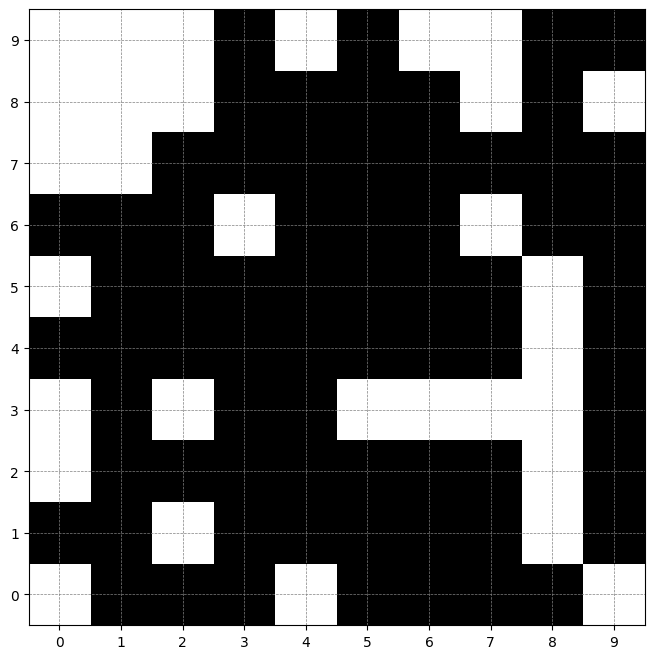

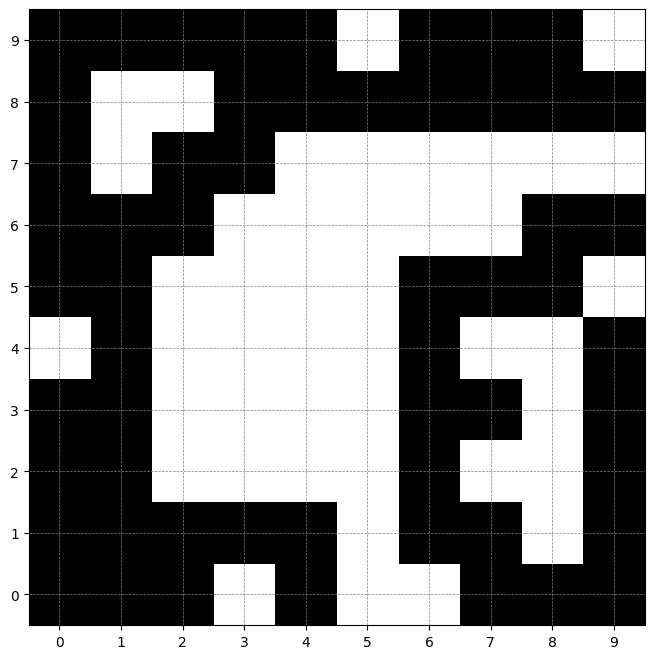

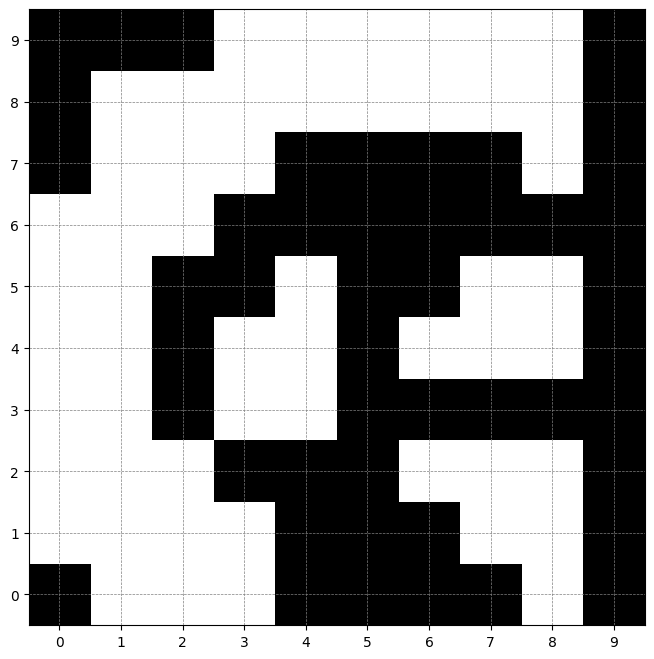

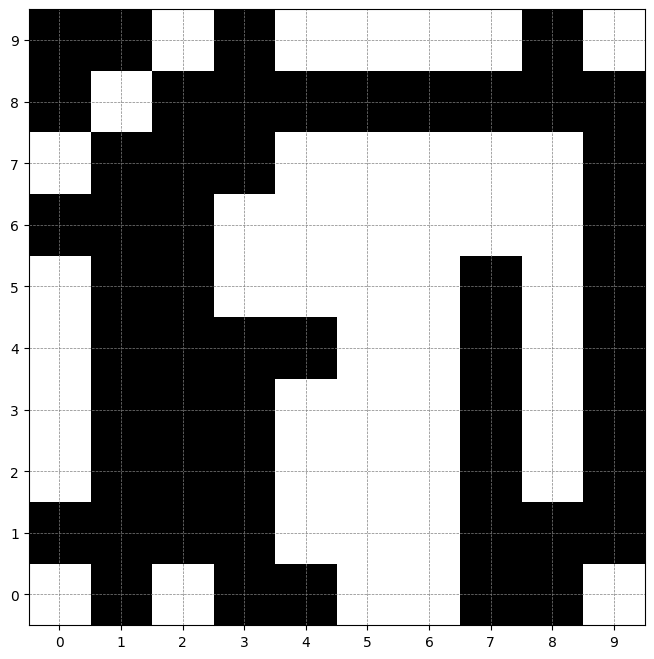

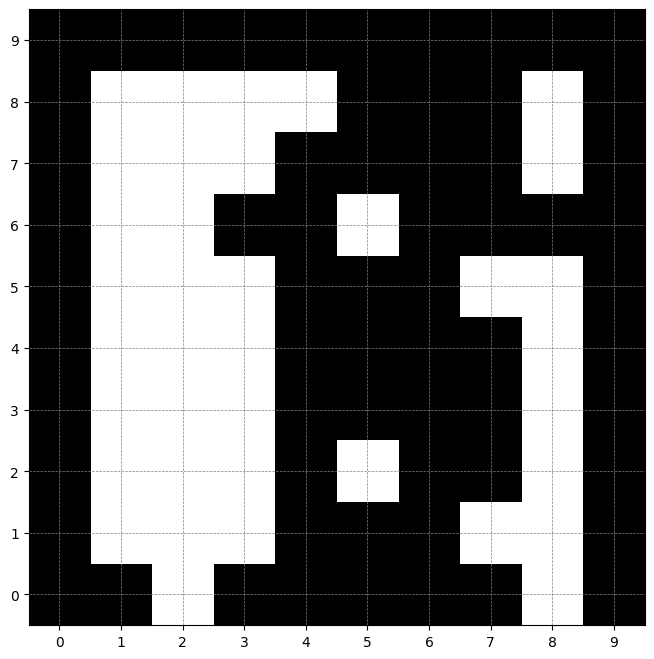

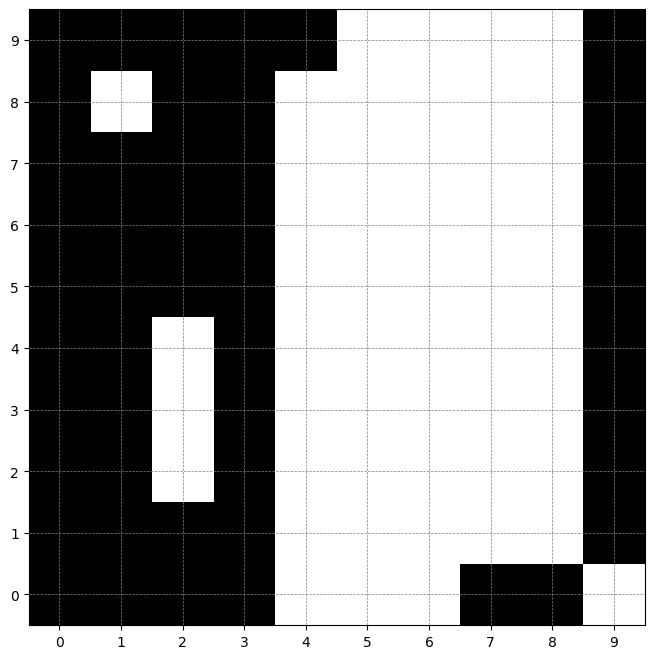

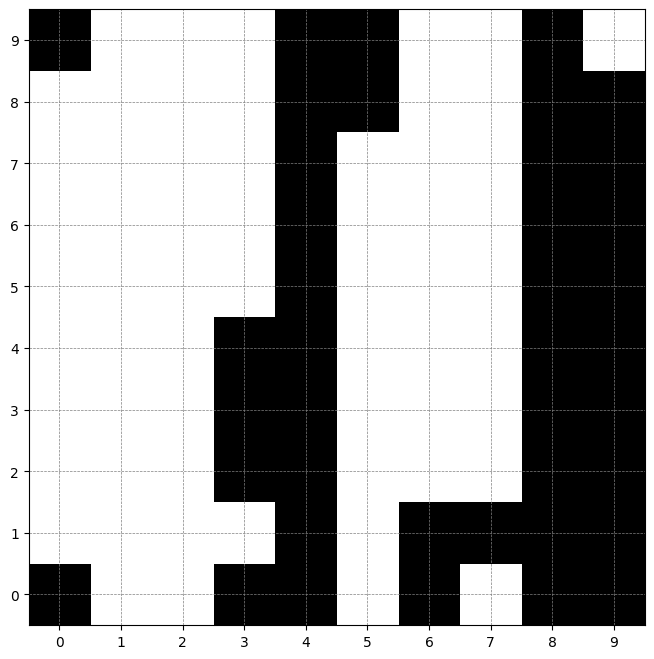

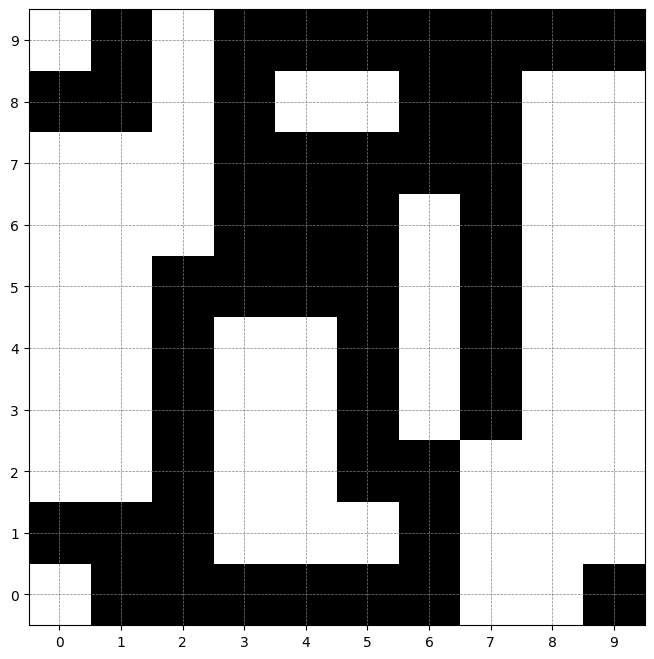

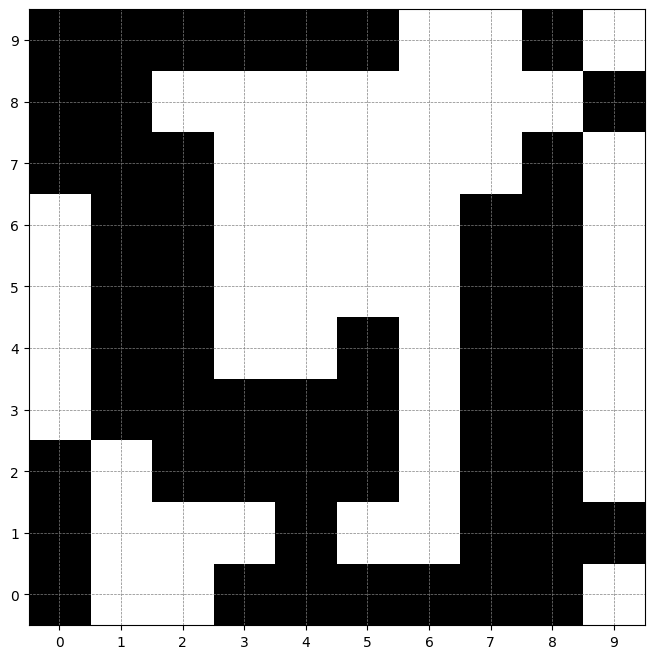

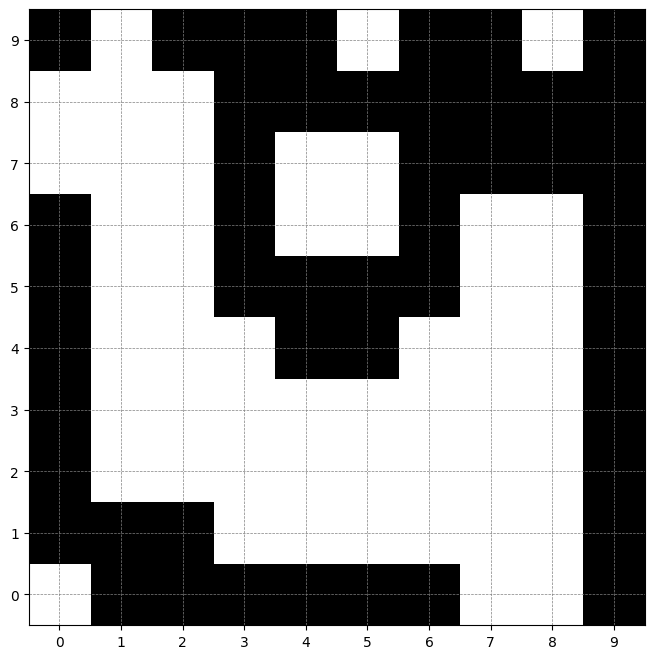

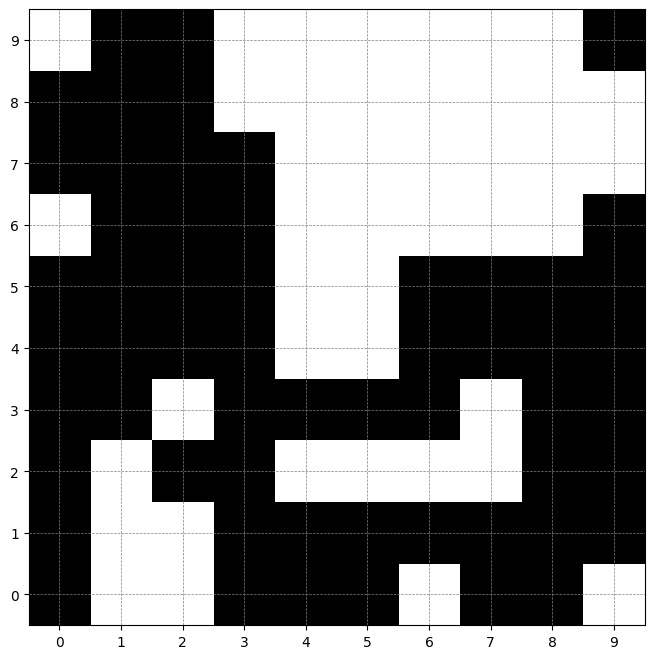

In [12]:
#testing
play_game_of_life_2()

#### Level 3 (non-binary states, 30 pts)

In this level, the states of the cells are not binary. Instead, the states are integers between $0$ and $255$, each representing a user specified state. For example, each cell may have three possibilities:
- $0$ to represent a removed cell
- $1$ to represent a live and susceptible cell
- $2$ to represent a cell infected by a virus

A set of rules could be:

A subset of cells is selected randomly to be infected (2), and the rest are susceptible (1). The grid is updated in each time step as follows:

- Infected (2) cells get a chance to pass the infection along to each of their Susceptible (1) neighbors, with a probability equal to the transmission rate.
- Infected (2) cells have a chance to transition to the removed (0) state, indicating that they are no longer capable of infecting others or being infected again. The probability of this transition is equal to the recovery rate.

```mermaid
stateDiagram-v2

S: Susceptible
I: Infected
R: Removed

S --> I: neighbor of an infected cell, and the infected cell infects the susceptible cell
S --> S: no infected neighbor, or the infected cell does not infect the susceptible cell
I --> R: recovers
R --> R
```

##### Task 3.1

After playing the game at https://meltingasphalt.com/interactive/going-critical/ and https://ncase.me/simulating/model/

- Implement a Python function `init_life_state_3()` by using NumPy to generate an initial random subset of non-binary cells.
- Implement a Python function `draw_life_state_3()` by using matplotlib to display the selected collection of cells (points). Use the following line of Python code to paint the background of the selected collection of cells in their respective colors with transparency.
```python
def draw_cell_background(x, y, color):
    plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color=color, alpha=0.5)
```

In [20]:
import numpy as np 
import matplotlib.pyplot as plt

def draw_cell_background3(x, y, color):
    plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color=color, alpha=0.5)


def init_life_state_3(n, m, p_list, states):
    """
    Generate an initial random subset of non-binary cells
    IN: n, int, number of rows
        m, int, number of columns
        p_list, list of float, probabilities of each state
        states, list of int, possible states of the cells
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    #p_list and states must be the same number
    assert len(p_list) == len(states)

    #probabilities must equal to 1
    assert abs(sum(p_list) - 1.0) < 1e-6


    flat_life_state = np.random.choice(states, size = n*m, p = p_list)
    life_state = flat_life_state.reshape(n,m)

    return life_state

##### Task 3.2

Implement a Python function `update_life_state_3()` that takes a 2D NumPy array representing the current state of the grid, and a dictionary specifying the rules, and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

For the Susceptible-Infected-Removed rules, the dictionary should be as follows:

```python 
rules = {
    0: [  # removed cells
        {
            "turn_to": 0  # always stay removed
        }
    ],
    1: [  # susceptible cells
        {
            "neighbor_to": {
                "if": [  # adjacent to at least 1 infected cell (type 2)
                    {
                        "at_least": 1,
                        "at_most": 9,  # always true
                        "type": 2
                    }
                ],
                "then": {
                    "probability": [  # 25% chance of getting infected and 75% chance of staying susceptible
                        {
                            "value": 0.25,  # transmission rate 25%
                            "then": {
                                "turn_to": 2
                            },
                        },
                        {
                            "value": 0.75,  # leftover 75%
                            "then": {
                                "turn_to": 1
                            }
                        }
                    ]
                }
            }
        }
    ],
    2: [
        {  # infected cells
            "probability": [  # 50% chance of recovering and 50% chance of staying infected
                {
                    "value": 0.5,  # recovery rate 50%
                    "then": {
                        "turn_to": 0
                    }
                },
                {
                    "value": 0.5,  # leftover 50%
                    "then": {
                        "turn_to": 2
                    }
                }
            ]
        }
    ]
}
```

```python
def update_life_state_3(life_state, rules_dict, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        rules_dict, dict, rules for updating the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    pass
```

Or you can create a constructor for `update_life_state_3()` as follows:

```python
def generate_update_life_state_3(rules_dict):
    """
    Generate a function that updates the life state according to the specified rules
    IN: rules_dict, dict, rules for updating the cells
    OUT: function, (life_state, out_life_state=None) -> out_life_state, evaluates the update rules for each cell
    """
    # define the update function using rules_dict
    def update_life_state_3(life_state, out_life_state=None):
        """
        For each cell evaluate the update rules specified above to obtain its new state
        IN: life_state, ndarray of shape (n, m), initial state of the cells
            out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
        OUT: ndarray of shape (n, m), next state of the cells
        """
        # specify the update rules using rules_dict
        pass

    # return the defined function
    return update_life_state_3
```

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def generate_update_life_state_3(rules_dict):
    """
    Generate a function that updates the life state according to the specified rules
    IN: rules_dict, dict, rules for updating the cells
    OUT: function, (life_state, out_life_state=None) -> out_life_state, evaluates the update rules for each cell
    """
    # Define the update function using rules_dict
    def update_life_state_3(life_state, out_life_state=None):
        """
        For each cell, evaluate the update rules specified above to obtain its new state
        IN: life_state, ndarray of shape (n, m), initial state of the cells
            out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
        OUT: ndarray of shape (n, m), next state of the cells
        """
        n, m = life_state.shape
        if out_life_state is None:
            out_life_state = np.zeros_like(life_state)

        # Define the neighbor kernel for 8-neighbor counting
        neighbor = np.array([[1, 1, 1],
                              [1, 0, 1],
                              [1, 1, 1]])

        # Calculate neighbor counts for each relevant state
        neighbor_counts = {}
        for state in set(
            condition["type"]
            for rules in rules_dict.values()
            for rule in rules
            if "neighbor_to" in rule
            for condition in rule["neighbor_to"]["if"]
        ):
            padded = np.pad(life_state == state, pad_width=1, mode='constant', constant_values=0)
            neighbor_counts[state] = (
                padded[:-2, :-2] + padded[:-2, 1:-1] + padded[:-2, 2:] +
                padded[1:-1, :-2] + 0 + padded[1:-1, 2:] +
                padded[2:, :-2] + padded[2:, 1:-1] + padded[2:, 2:]
            )

        # Update each cell based on the rules
        for i in range(n):
            for j in range(m):
                current_state = life_state[i, j]
                if current_state not in rules_dict:
                    out_life_state[i, j] = current_state
                    continue

                # Check all the neighbor conditions
                for rule in rules_dict[current_state]:
                    if "neighbor_to" in rule:
                        condition_met = True
                        for condition in rule["neighbor_to"]["if"]:
                            neighbor_type = condition["type"]
                            at_least = condition.get("at_least", 0)
                            at_most = condition.get("at_most", 9)
                            count = neighbor_counts[neighbor_type][i, j]
                            if not (at_least <= count <= at_most):
                                condition_met = False
                                break
                        if condition_met:
                            probabilities = rule["neighbor_to"]["then"]["probability"]
                            rand_val = np.random.rand()
                            cumulative_prob = 0
                            for prob_rule in probabilities:
                                cumulative_prob += prob_rule["value"]
                                if rand_val <= cumulative_prob:
                                    out_life_state[i, j] = prob_rule["then"]["turn_to"]
                                    break
                            break
                    elif "probability" in rule:
                        probabilities = rule["probability"]
                        rand_val = np.random.rand()
                        cumulative_prob = 0
                        for prob_rule in probabilities:
                            cumulative_prob += prob_rule["value"]
                            if rand_val <= cumulative_prob:
                                out_life_state[i, j] = prob_rule["then"]["turn_to"]
                                break
                        break
        return out_life_state

    # Return the defined function
    return update_life_state_3


##### Task 3.3

Similar to Task 1.3, except that the function to be called is `draw_life_state_3()`.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def draw_life_state_3(life_state, colors):
    """
    Display the 2D positions of the selected collection of cells (2D points).
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        colors, list of str, colors of the states
    OUT: None
    """
    n, m = life_state.shape

    # Clear the output of the previous frame
    clear_output(wait=True)

    # Set up the figure
    plt.figure(figsize=(8, 8))
    plt.gca().set_aspect('equal')  # Fix aspect ratio
    plt.gca().set_xticks(range(m))
    plt.gca().set_yticks(range(n))
    plt.gca().grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
    # plt.gca().invert_yaxis()  # Optionally, invert y-axis if needed

    # Draw each cell
    for i in range(n):
        for j in range(m):
            state = life_state[i, j]
            color = colors[state]  # Get the color for the current state
            draw_cell_background3(j, n - i - 1, color)  # Plot the cell

    plt.show()  # Show the plot
    plt.pause(0.5)  # Pause to make the image visible for a short period

def draw_cell_background3(x, y, color):
    """
    Draw a cell at position (x, y) with a given color.
    IN: x, x-coordinate (column)
        y, y-coordinate (row)
        color, color of the cell (str or color code)
    OUT: None
    """
    # Plot the cell as a square
    plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color=color))


##### Task 3.4

Implement a Python function `play_game_of_life_3()` that is similar to Task 1.4 `play_game_of_life_1()`, except that the user should be able to specify the rules as a JSON file in the format of a dictionary. When saving the initial collection of life cells and the final configuration, the function should also write the rules as a JSON file in the format of a dictionary.

In [23]:
import json
import csv

def play_game_of_life_3():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    try: 
    # ask the user for initial state
        n = int(input("Please enter number of rows: "))
        m = int(input("Please enter number of columns: "))
        total = 0
        while (total != 1.0):
            check = input('The following 3 input values need to be decimal values that add up to 1.')
            removedp = float(input("Please enter probability of a cell being removed (0-1): "))
            susceptiblep = float(input("Please enter probability of a cell being susceptible (0-1): "))
            infectedp = float(input("Please enter probability of a cell being infected (0-1): "))
            total = removedp + susceptiblep + infectedp
        
        p_vals = [removedp, susceptiblep, infectedp]
        life_state = init_life_state_3(n, m, p_vals, [0,1,2])
        initial_state = life_state.copy()
        
        # ask the user for the rules
        transmission_rate = float(input("Enter the transmission rate as a decimal from 0-1"))
        while transmission_rate > 1 or transmission_rate < 0:
            transmission_rate = float("Invalid input. Enter a transmission rate as a decimal between 0 and 1")
        
        recovery_rate = float(input("Enter the recovery rate as a decimal from 0-1"))
        while recovery_rate > 1 or recovery_rate < 0:
            recovery_rate = float("Invalid input. Enter a recovery rate as a decimal between 0 and 1")
        
        at_least_neighbor = int(input("If a cell is a neighbor to atleast ___ infected cells, then there is a chance it will get infected. Fill in the blank with an integer between 0-8"))
        while at_least_neighbor > 8 or at_least_neighbor < 0:
            at_least_neighbor = float("Invalid input. Enter a whole number between 0 and 8")
    except:
        print("Incorrect data types entered. Default values used.")
        n = 10
        m = 10
        #default removedp, susceptiblep, and infectedp vals are 0.2, 0.4, 0.4
        life_state = init_life_state_3(n,m,[0.2, 0.4, 0.4], [0,1,2])
        initial_state = life_state.copy()
        transmission_rate = 0.25 
        at_least_neighbor = 1
        
        recovery_rate = .50
    
    
    #create the rules dictionary
    rules = {
        0: [ { "turn_to": 0  } ],
        1: [{ "neighbor_to": {
            "if": [ { "at_least": at_least_neighbor,"at_most": 9, "type": 2 }],
            "then": { "probability": [ 
                        {"value": transmission_rate, "then": {"turn_to": 2}, },
                        {"value": 1-transmission_rate,"then": {"turn_to": 1}} 
                                ] }
                    } } ],
        2: [{ "probability": [ {
            "value": recovery_rate,
            "then": { "turn_to": 0} },
                { "value": 1- recovery_rate, "then": 
                 {"turn_to": 2} }
            ]} ]
        }
    

    # update the grid and display it at each iteration

    #first inital state
    colors = ["white", "blue", "red"] # default
    draw_life_state_3(initial_state, colors)

    while True:
        update_fn = generate_update_life_state_3(rules)
        life_state = update_fn(life_state)
        draw_life_state_3(life_state, colors)

        cont = input("Do you want to continue to the next iteration? yes/no").lower()
        if cont != 'yes':
            break
    
    # ask the user if he/she wants to update more times
    extra_iterations = input("Do you want more iterations? yes/no").lower()
    display_iterations = input("Do you want to display each iteration? yes/no").lower()
    while extra_iterations == 'yes':
        iterations = int(input("Please enter number of iterations: "))
        for i in range(iterations):
            update_fn = generate_update_life_state_3(rules)
            life_state = update_fn(life_state)
            if display_iterations == 'yes' : draw_life_state_3(life_state, colors)
        extra_iterations = input("Do you want more iterations? yes/no ").lower()
    
    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file, and the rules as a JSON file
    save = input("Do you want to save as a CSV? ").lower()
    if save == 'yes':
        initial_name = input("What is the name of the initial state file name? ")
        final_name = input("What is the name of the final state file name? ")
        rules_file = input("What is the name of the rules file? ")
        with open(initial_name, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(initial_state.astype(int))
        with open(final_name, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(life_state.astype(int))
        with open(rules_file, "w") as json_file:
            json.dump(rules, json_file)


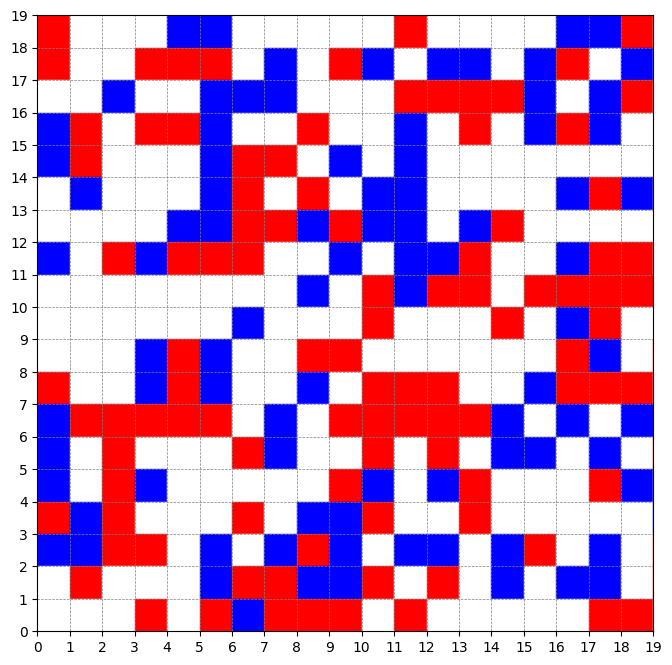

In [26]:
play_game_of_life_3()

In [18]:
# Play Game Visual
import time

def super_play_game_of_life_3():
    """
    Play the game of life with improved visuals for each iteration.
    """
    try:
        # User input for grid size and probabilities
        n = int(input("Please enter the number of rows: "))
        m = int(input("Please enter the number of columns: "))
        total = 0
        while total != 1.0:
            print('Enter decimal probabilities for cell states (they must sum to 1).')
            removedp = float(input("Probability of a cell being removed (0-1): "))
            susceptiblep = float(input("Probability of a cell being susceptible (0-1): "))
            infectedp = float(input("Probability of a cell being infected (0-1): "))
            total = removedp + susceptiblep + infectedp
            if total != 1.0:
                print("The probabilities must sum to 1. Please try again.")

        p_vals = [removedp, susceptiblep, infectedp]
        life_state = init_life_state_3(n, m, p_vals, [0, 1, 2])
        initial_state = life_state.copy()

        # User input for rules
        transmission_rate = float(input("Enter the transmission rate (0-1): "))
        recovery_rate = float(input("Enter the recovery rate (0-1): "))
        at_least_neighbor = int(input("Minimum number of infected neighbors for a cell to get infected (0-8): "))

    except Exception:
        print("Invalid input. Using default values.")
        n, m = 10, 10
        life_state = init_life_state_3(n, m, [0.2, 0.4, 0.4], [0, 1, 2])
        initial_state = life_state.copy()
        transmission_rate, recovery_rate = 0.25, 0.5
        at_least_neighbor = 1


    # Define rules
    rules = {
        0: [{"turn_to": 0}],
        1: [
            {
                "neighbor_to": {
                    "if": [{"at_least": at_least_neighbor, "at_most": 8, "type": 2}],
                    "then": {
                        "probability": [
                            {"value": transmission_rate, "then": {"turn_to": 2}},
                            {"value": 1 - transmission_rate, "then": {"turn_to": 1}},
                        ]
                    },
                }
            }
        ],
        2: [
            {
                "probability": [
                    {"value": recovery_rate, "then": {"turn_to": 0}},
                    {"value": 1 - recovery_rate, "then": {"turn_to": 2}},
                ]
            }
        ],
    }

    # Set up the update function and display the initial state
    update_fn = generate_update_life_state_3(rules)
    colors = ["white", "blue", "red"]

    print("Starting simulation...")
    draw_life_state_3(life_state, colors)
    time.sleep(1)

    # Main simulation loop
    while True:
        life_state = update_fn(life_state)
        draw_life_state_3(life_state, colors)
        time.sleep(1)  # Pause for 1 second between updates

        cont = input("Continue to next iteration? (yes/no): ").lower()
        if cont != "yes":
            break

    # Extra iterations option
    extra_iterations = input("Run more iterations automatically? (yes/no): ").lower()
    if extra_iterations == "yes":
        iterations = int(input("Enter number of extra iterations: "))
        for _ in range(iterations):
            life_state = update_fn(life_state)
            draw_life_state_3(life_state, colors)
            time.sleep(1)

    # Save state and rules option
    save = input("Save initial and final states, and rules? (yes/no): ").lower()
    if save == "yes":
        initial_name = input("Initial state file name (CSV): ")
        final_name = input("Final state file name (CSV): ")
        rules_file = input("Rules file name (JSON): ")
        with open(initial_name, mode="w", newline="") as file:
            writer = csv.writer(file)
            writer.writerows(initial_state.astype(int))
        with open(final_name, mode="w", newline="") as file:
            writer = csv.writer(file)
            writer.writerows(life_state.astype(int))
        with open(rules_file, "w") as file:
            json.dump(rules, file)

    print("Simulation completed.")


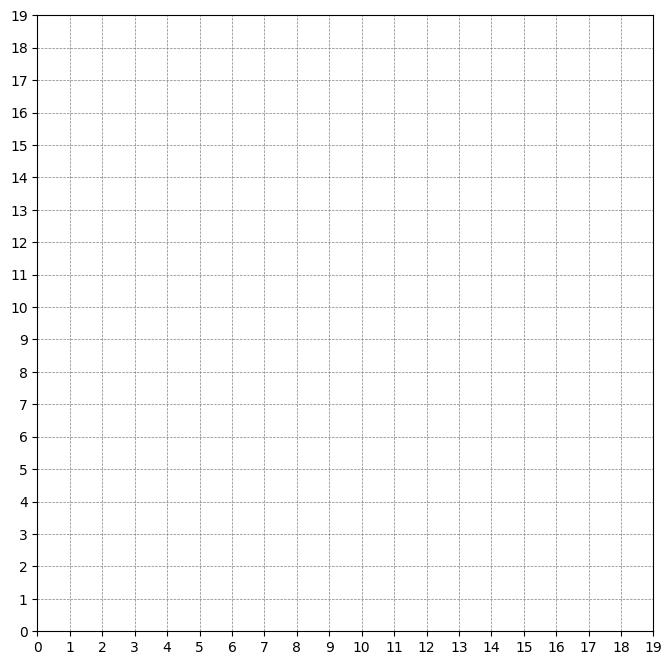

Simulation completed.


In [25]:
super_play_game_of_life_3()

#### References

> - Gardner, Martin (October 1970). "The fantastic combinations of John Conway's new solitaire game 'life'" (PDF). Mathematical Games. Scientific American. Vol. 223, no. 4. pp. 120–123. doi:10.1038/scientificamerican1070-120. JSTOR 24927642.
> - Berlekamp, E. R.; Conway, John Horton; Guy, R. K. (2001–2004). Winning Ways for your Mathematical Plays (2nd ed.). A K Peters Ltd.
> - Izhikevich, Eugene M.; Conway, John H.; Seth, Anil (2015-06-21). "Game of Life". Scholarpedia. 10 (6): 1816. Bibcode:2015SchpJ..10.1816I. doi:10.4249/scholarpedia.1816. ISSN 1941-6016.
> - "NaiveLife Emulated: A reading-order simulation of Life". ConwayLife.com. 24 May 2020.
> - Goucher, Adam. "Re: Thread For Your Accidental Discoveries". ConwayLife.com.
> - Ian07. "Re: Strange spaceship that is supposed to be impossible and infinite cell spread". ConwayLife.com. "I'm pretty sure this is because you've accidentally created an implementation of what's sometimes known as NaiveLife (as it's a common mistake made by many people coding CGoL for the first time):"
> - Brown, Nico; Cheng, Carson; Jacobi, Tanner; Karpovich, Maia; Merzenich, Matthias; Raucci, David; Riley, Mitchell (5 December 2023). "Conway's Game of Life is Omniperiodic". arXiv:2312.02799 [math.CO].
> - "LifeWiki:Game of Life Status page - LifeWiki". conwaylife.com.
> - Stone, Alex (2024-01-18). "Math's 'Game of Life' Reveals Long-Sought Repeating Patterns". Quanta Magazine.
> - "Conway's Game of Life". Rosetta Code. June 7, 2024.